# Project : Wrangling & Analyzing Data

## Introduction : 
#### In This Project we have three database files : tweet_json.txt, image-predictions.tsv, twitter-archive-enhanced.csv

#### First step is to gather the data from files which are in different formats. Assess Data if there are any discrepancy and then writing code to clean the data and then test the code if its working as expected.

#### Second Step is to merge all the three cleaned files to make a master database  

#### Third Step will be to visualize the dataset and do some analysis
        

In [1]:
# importing all the common libraries that will be used in the project
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt 
import json
import requests
%matplotlib inline

## Gathering Data

### Loading First Dataset : tweet_json.txt

In [2]:
# Reading the tweet_json.txt file given in the resource section

with open('tweet_json.txt', 'r') as test:
    for l in test:
        testdata = json.loads(l)
        print(json.dumps(testdata, indent=2))
        break

{
  "created_at": "Tue Aug 01 16:23:56 +0000 2017",
  "id": 892420643555336193,
  "id_str": "892420643555336193",
  "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  "truncated": false,
  "display_text_range": [
    0,
    85
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 892420639486877696,
        "id_str": "892420639486877696",
        "indices": [
          86,
          109
        ],
        "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "url": "https://t.co/MgUWQ76dJU",
        "display_url": "pic.twitter.com/MgUWQ76dJU",
        "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1",
        "type": "photo",
        "sizes": {
          "large": {
            "w": 540,
            "h":

In [3]:
# Selecting Labels for the tweet_text file for detailed investigation

tweet_labels = ['id', 'favorite_count', 'retweet_count','contributors','lang']
dict_tweets = []

with open('tweet_json.txt', 'r') as jsfile:
    tweet_line = jsfile.readline()
    # Extracting each line
    while tweet_line:
        dict1 = json.loads(tweet_line)
        dict_values = dict((id_val, dict1[id_val]) for id_val in tweet_labels)
        dict_tweets.append(dict_values)
        
        tweet_line = jsfile.readline()
    
df_tweet = pd.DataFrame.from_dict(dict_tweets)


In [4]:
# Creating a copy of original so that the original file stays entact
df_tweet_copy = df_tweet.copy()

In [5]:
# Checking the info of the dataset
df_tweet_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
contributors      0 non-null object
favorite_count    2354 non-null int64
id                2354 non-null int64
lang              2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


### Quality Issues - Image Predictions
#### 1) Looks like contributors column is all blank thus need to remove it
#### 2) Check if language column has just english language remove that too otherwise keep it as it is for further analysis 


### Tidiness Issues - Image Predictions
#### 1) id Needs to be converted to tweet_id so that all the three dataframes have a comon column with same name




#### Code For Observation 1 : For tweet_json.txt Dataframe
#### Removing the Contributors Column

In [6]:
# Dropping the Contributors column.

df_tweet_copy = df_tweet_copy.drop(['contributors'], axis = 1)


#### Testing the Above Code :

In [7]:
df_tweet_copy.head(5)

,favorite_count,id,lang,retweet_count
0,39467,892420643555336193,en,8853
1,33819,892177421306343426,en,6514
2,25461,891815181378084864,en,4328
3,42908,891689557279858688,en,8964
4,41048,891327558926688256,en,9774


#### Code Works absolutely fine and the Contributors column is removed successfully.



#### Code For Observation 2 : For tweet_json.txt Dataframe
#### To verify that language has other values apart from english otherwise remove this column as well

In [8]:

df_tweet_copy.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'], dtype=object)

#### Lang column has more than one language available thus we will keep this column for further investigation

#### Assessing if there are any Duplicates available for For tweet_json.txt Dataframe

In [9]:
# Finding Duplicates : 

df_tweet_copy[df_tweet_copy.id.duplicated()]


,favorite_count,id,lang,retweet_count


#### No duplicate entries found so no action is required

### Loading Second Dataset : image-predictions.tsv

In [10]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)


335079

In [11]:
# Since its a tsv file thus using the separator as '\t'

df_img = pd.read_csv("image_predictions.tsv", sep = '\t')
df_img.head(2)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Quick Observations :
#### Few columns do not look relevant for investigation purpose like jpg_url , img_num etc


In [12]:
df_img.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quick Observations 
#### No Null values observed for the dataframe for any column 
#### All Data Types looks correct
#### May be need to rename few columns as they are not in understandable from name like p1 , p2 etc

In [13]:
# Creating a copy of original dataset so that the original stays entact

df_img_copy = df_img.copy()

# Testing if the copy is created successfully.
df_img_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues - Image Predictions
#### 1) Renaming few columns like p1, p2, p3
#### 2) Removal of few columns like jpg_url,img_num , p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog which does'nt look important for the investigation purpose

#### Code For Observation 1 : For  Dataframe image-predictions.tsv
#### Renaming column name which does not make sense in the original table.

In [14]:
#Renaming columns from image-prediction dataframe
df_img_copy = df_img_copy.rename(columns={'p1':'dog_breed_prediction1','p2':'dog_breed_prediction2','p3':'dog_breed_prediction3'})


#### Testing the above code :                                                                                                                                                                               p1 renamed to dog_breed_prediction1  and p2 is renamed to dog_breed_prediction2  and  p3 is renamed to dog_breed_prediction3'

In [15]:
df_img_copy.head(2)

,tweet_id,jpg_url,img_num,dog_breed_prediction1,p1_conf,p1_dog,dog_breed_prediction2,p2_conf,p2_dog,dog_breed_prediction3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Thus verified that all the columns are renamed with the new names as mentioned above.





#### Code For Observation 2 : For  Dataframe image-predictions.tsv
#### Dropping few columns which may not be required for further investigation

In [16]:
df_img_copy = df_img_copy.drop(['jpg_url', 'img_num', 'p1_conf', 'p1_dog','p2_conf', 'p2_dog','p3_conf', 'p3_dog' ], axis =1)


#### Test if the desired columns are removed


In [17]:
df_img_copy.head(2)

,tweet_id,dog_breed_prediction1,dog_breed_prediction2,dog_breed_prediction3
0,666020888022790149,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,666029285002620928,redbone,miniature_pinscher,Rhodesian_ridgeback


### Loading Third  Dataset : twitter-archive-enhanced.csv

In [18]:
df_twitter = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Quick Observations :
#### Time Stamp has both time and Date so that can splitted into separate column

In [19]:
df_twitter.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Quick Observations :

#### There are many columns that does not look relevant from the investigation point of view like "in_reply_to_status_id ", "in_reply_to_user_id", "expanded_urls" etc and they have many Null values also so these col. can be removed

#### There are many columns with Null Values like "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id" etc



In [20]:
# Creating a copy of df_twitter so that original remains entact
df_twitter_copy = df_twitter.copy()
df_twitter_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Observation 1 : For twitter-archive-enhanced.csv

#### Dropping the columns which may not be used by for our investigation

#### Code For it 

In [21]:
df_twitter_copy = df_twitter_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"], axis = 1)


#### Test if the desired columns are removed from the dataframe

In [22]:

df_twitter_copy.head(2)

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None


#### Observation 2 : 

#### Timestamp has both date and time in a single column so need to split it to two columns Time and Date

#### Code for it :


In [23]:
new = df_twitter_copy["timestamp"].str.split(" ", n = 1, expand = True)
df_twitter_copy["Date"]= new[0]
df_twitter_copy["Time"]= new[1]
df_twitter_copy = df_twitter_copy.drop(["timestamp"], axis = 1)


#### Test that dataframe now has Date and Time two column with date and time values respectively:

In [24]:
df_twitter_copy.head(2)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56 +0000
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27 +0000


#### Observation 3: 

####  Time has +0000 added to it so need to ignore that value

#### Code for it : 

In [25]:
# Split the Time column with '+' and then take the first element and ignore the second
new2 = df_twitter_copy["Time"].str.split("+",n=1, expand = True)
df_twitter_copy["Time"]= new2[0]



#### Test that now the time column does not have +0000 added to it

In [26]:
df_twitter_copy.head(2)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27


In [27]:
df_twitter_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id               2356 non-null int64
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
doggo                  2356 non-null object
floofer                2356 non-null object
pupper                 2356 non-null object
puppo                  2356 non-null object
Date                   2356 non-null object
Time                   2356 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 221.0+ KB


#### Observation 4 :
    
#### Date is in string datatype so convert it to datetime format

#### Code

In [28]:
df_twitter_copy["Date"] = pd.to_datetime(df_twitter_copy["Date"])


#### Test that the Date is now in DateTime Format

In [29]:
df_twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id               2356 non-null int64
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
doggo                  2356 non-null object
floofer                2356 non-null object
pupper                 2356 non-null object
puppo                  2356 non-null object
Date                   2356 non-null datetime64[ns]
Time                   2356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 221.0+ KB


#### Date is successfully converted to DateTime Object which will be useful while analysis

#### Observation 5 :

#### There are few rows where All Lingo Columns (Doggo, Floffer, Puppo, pupper) have None value Thus we need to remove all the None or NAN value to get the correct type of Lingos

#### This was found when the df_twitter_copy.Dog_Lingo.value_counts() command was run without replacing None values.In the categories. I was getting None Category as a unique value as follows:

#### NoneNoneNoneNone        1976
#### NoneNonepupperNone       245
#### doggoNoneNoneNone         83
#### NoneNoneNonepuppo         29
#### doggoNonepupperNone       12
#### NoneflooferNoneNone        9
#### doggoflooferNoneNone       1
#### doggoNoneNonepuppo         1
#### Name: Dog_Lingo, dtype: int64

#### Code to replace all the None/NAN values with Blank   :

In [30]:
df_twitter_copy.doggo.replace('None', '', inplace = True)
df_twitter_copy.replace(np.NaN, '', inplace = True)
df_twitter_copy.floofer.replace('None', '', inplace = True)
df_twitter_copy.floofer.replace(np.NaN, '', inplace = True)
df_twitter_copy.replace('None', '', inplace = True)
df_twitter_copy.pupper.replace(np.NaN, '', inplace = True)
df_twitter_copy.puppo.replace('None', '', inplace = True)
df_twitter_copy.puppo.replace(np.NaN, '', inplace = True)

#### Observation 6 :

#### When searched online floofer(Fluffy), pupper(puppy), puppo(puppy) , doggo are the Lingos used for Dogs. Thus instead of putting them as a separate column combining them as one column called "Dog_Lingo"

#### Code to have one column for category instead of Three columns for each category


In [31]:

df_twitter_copy["Dog_Lingo"] = df_twitter_copy.doggo+df_twitter_copy.floofer+df_twitter_copy.pupper+df_twitter_copy.puppo



#### Testing Observation 5 and 6 


In [32]:
df_twitter_copy.Dog_Lingo.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: Dog_Lingo, dtype: int64

#### Verified that now we do not get None category in the Dog_Lingo Column 

In [33]:
df_twitter_copy.head(10)


,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Date,Time,Dog_Lingo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,,13,10,Phineas,,,,,2017-08-01,16:23:56,
1,892177421306343426,This is Tilly. She's just checking pup on you....,,13,10,Tilly,,,,,2017-08-01,00:17:27,
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,,12,10,Archie,,,,,2017-07-31,00:18:03,
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,,13,10,Darla,,,,,2017-07-30,15:58:51,
4,891327558926688256,This is Franklin. He would like you to stop ca...,,12,10,Franklin,,,,,2017-07-29,16:00:24,
5,891087950875897856,Here we have a majestic great white breaching ...,,13,10,,,,,,2017-07-29,00:08:17,
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,,13,10,Jax,,,,,2017-07-28,16:27:12,
7,890729181411237888,When you watch your owner call another dog a g...,,13,10,,,,,,2017-07-28,00:22:40,
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,,13,10,Zoey,,,,,2017-07-27,16:25:51,
9,890240255349198849,This is Cassie. She is a college pup. Studying...,,14,10,Cassie,doggo,,,,2017-07-26,15:59:51,doggo


#### Verified that now we have one separate column for Lingo 


#### Dropping columns doggo, floofer, pupper, puppo as already we have now Dog_Lingo as verified above

In [34]:

df_twitter_copy = df_twitter_copy.drop(['doggo','floofer', 'pupper','puppo'], axis =1)


#### Test that all the required columns are removed

In [35]:
df_twitter_copy.head(2)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,,13,10,Phineas,2017-08-01,16:23:56,
1,892177421306343426,This is Tilly. She's just checking pup on you....,,13,10,Tilly,2017-08-01,00:17:27,


#### To Check if name has any null value

In [36]:
k = df_twitter_copy['name'].isnull().sum()
print (k)

0


#### Name does not have any Null value

In [37]:
df_twitter_copy.head(2)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,,13,10,Phineas,2017-08-01,16:23:56,
1,892177421306343426,This is Tilly. She's just checking pup on you....,,13,10,Tilly,2017-08-01,00:17:27,


#### To Check if there are any duplicate names before that convert names to upper 

In [38]:
# Convert name column to Upper case so that duplicates can be idenfied (for case insensitivity)
df_twitter_copy['name'] = df_twitter_copy['name'].str.upper()


#### Test that the names are converted to upper case

In [39]:
df_twitter_copy.head(2)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,,13,10,PHINEAS,2017-08-01,16:23:56,
1,892177421306343426,This is Tilly. She's just checking pup on you....,,13,10,TILLY,2017-08-01,00:17:27,


In [40]:
# Check duplicate name entries
duplicated_name = df_twitter_copy[df_twitter_copy['name'].duplicated()]
duplicated_name

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
7,890729181411237888,When you watch your owner call another dog a g...,,13,10,,2017-07-28,00:22:40,
12,889665388333682689,Here's a puppo that seems to be on the fence a...,,13,10,,2017-07-25,01:55:32,puppo
23,887473957103951883,This is Canela. She attempted some fancy porch...,,13,10,CANELA,2017-07-19,00:47:34,
24,887343217045368832,You may not have known you needed to see this ...,,13,10,,2017-07-18,16:08:03,
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We...,,12,10,,2017-07-18,00:07:08,
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,,12,10,,2017-07-15,16:51:35,
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.86054e+17,12,10,,2017-07-15,02:45:48,
35,885518971528720385,I have a new hero and his name is Howard. 14/1...,,14,10,,2017-07-13,15:19:09,
37,885167619883638784,Here we have a corgi undercover as a malamute....,,13,10,,2017-07-12,16:03:00,
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is gr...",,14,10,,2017-07-10,15:58:53,


#### There are many entries with None/NAN values and an invalid name like "A "so make a subset dataframe which does not have None/NAN entry and contains only invalid name "A"

In [41]:
# Select Duplicate names and then select a subset where Name does not have NAN/NONE value and name = "A"
duplicated_subset1 = pd.DataFrame(df_twitter_copy[df_twitter_copy.duplicated('name')])
duplicated_subset1 = duplicated_subset1[(duplicated_subset1.name != "NaN") & (duplicated_subset1.name != "NONE") & (duplicated_subset1.name == "A") ]

#Select text name and tweet id and use the below code so that the text is not truncated

with pd.option_context('display.max_colwidth', -1):
 display(duplicated_subset1[['tweet_id','text','name']])



,tweet_id,text,name
649,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,A
801,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,A
1002,747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,A
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,A
1017,746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,A
1049,743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,A
1193,717537687239008257,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,A
1207,715733265223708672,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,A
1340,704859558691414016,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,A
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,A


#### From the above dataset we have few more observations : 

#### Observation 7:
#### On Digging deeper it was found that many of the dogs where name is mentioned as "A" is not a dog its a giraffe/carrot/bow etc
#### Read the text of such rows and identified the tweet_id. Need to delete such rows as they are not valid

#### Observation 8:
#### Also In many of columns where name has "A/AN/THE" . Text has names of the dog like : "This is a Helvetica Listerine named Rufus."
#### Thus need to search such rows and get the names from text column

#### Observation 9:
#### Remove the invalid name entries 

#### Code for Observation 7:
#### Removing the entries from the above dataset where name is "A" and the text shows that these are not Dog entries while they are like Girrafe entry or a carrot or a dog bow entry

In [42]:

df_twitter_copy = df_twitter_copy.drop((df_twitter_copy[df_twitter_copy['tweet_id'] == 772581559778025472].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 747885874273214464].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 747816857231626240].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 746872823977771008].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 717537687239008257].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 715733265223708672].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 704859558691414016 ].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 704054845121142784].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 700864154249383937].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 679530280114372609].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 675534494439489536].index) | (df_twitter_copy[df_twitter_copy['tweet_id'] == 675109292475830276].index))

#### Test that all the above mentioned entries are removed from the dataframe :

In [43]:
# Select the same dataset to test the selected rows are deleted

duplicated_subset2 = pd.DataFrame(df_twitter_copy[df_twitter_copy.duplicated('name')])
duplicated_subset2 = duplicated_subset2[(duplicated_subset2.name != "NaN") & (duplicated_subset2.name != "NONE") & (duplicated_subset2.name == "A") ]
with pd.option_context('display.max_colwidth', -1):
 display(duplicated_subset2[['tweet_id','text','name']])



,tweet_id,text,name
649,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,A
1049,743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,A
1361,703079050210877440,This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW,A
1368,702539513671897089,This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6,A
1499,692187005137076224,This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N,A
1785,677644091929329666,This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND,A
1853,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,A
1878,675047298674663426,This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI,A
1923,674082852460433408,This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU,A
1941,673715861853720576,This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl,A


#### So all the rows which were not valid dog entries and name is "A" are removed 



#### Code for Observation 8 : Get the names which have invalid entries like "A/AN/THE"  check their text entries and get the names from it if available. From the data seen visually it looks like few of them have text which says that the the dog "named XYZ" so we can use this pattern to get valid names.

In [44]:
# First create a dataframe where the names seems to be invalid like 'A/AN/THE'

df_invalid_names = pd.DataFrame(df_twitter_copy[(df_twitter_copy['name'] == "A") | (df_twitter_copy['name'] == "AN") |(df_twitter_copy['name'] == "THE")]) 

# Count the invalid name entries
df_invalid_names.count()

tweet_id               58
text                   58
retweeted_status_id    58
rating_numerator       58
rating_denominator     58
name                   58
Date                   58
Time                   58
Dog_Lingo              58
dtype: int64

In [45]:
# Now use the above dataframe and get the text column that may have name entry (search by string "Named") and then use the split 
# function to fetch the valid name value.

df_findname = pd.DataFrame(df_invalid_names[df_invalid_names['text'].str.contains(pat = 'named')])
df_findname['newName']=df_findname.text.str.split('named', expand = True)[1]
df_findname['newName']=df_findname.newName.str.split('.', expand = True)[0]

df_findname['name']=df_findname['newName']
df_findname = df_findname.drop(['newName'], axis = 1)



In [46]:
# Check all the names are fetched 
df_findname

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
1853,675706639471788032,This is a Sizzlin Menorah spaniel from Brookly...,,10,10,Wylie,2015-12-12,15:59:51,
1955,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip...,,10,10,Kip,2015-12-06,22:54:44,
2034,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yac...,,11,10,Jacob (Yacōb),2015-12-01,17:30:22,
2066,671147085991960577,This is a Helvetica Listerine named Rufus. Thi...,,9,10,Rufus,2015-11-30,02:01:49,
2116,670427002554466305,This is a Deciduous Trimester mix named Spork....,,9,10,Spork,2015-11-28,02:20:27,
2125,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee...,,9,10,Cherokee,2015-11-27,22:01:40,
2128,670303360680108032,This is a Speckled Cauliflower Yosemite named ...,,9,10,Hemry,2015-11-27,18:09:09,
2146,669923323644657664,This is a spotted Lipitor Rumpelstiltskin name...,,10,10,Alphred,2015-11-26,16:59:01,
2161,669564461267722241,This is a Coriander Baton Rouge named Alfredo....,,10,10,Alfredo,2015-11-25,17:13:02,
2191,668955713004314625,This is a Slovakian Helter Skelter Feta named ...,,10,10,Leroi,2015-11-24,00:54:05,


#### Now Replacing all the fetched name from the above created temporary dataframe to the dataframe where all data cleaning is being done

In [47]:
# Check the length of the above created temporary dataframe where all valid names are populated and then get the twitter id for
# all the entries and then replace the new valid name in the orinal table "df_twitter_copy"

n = len(df_findname)
for i in range(n):
   id = df_findname["tweet_id"].iloc[i]
   name = df_findname["name"].iloc[i]
   df_twitter_copy.loc[(df_twitter_copy.tweet_id == id),'name']=name




#### Testing wheather all names are fetched and populated correctly on the dataframe where all cleaning activities are being done
#### Testing first and last twitter id 

In [48]:
 
print (df_twitter_copy[df_twitter_copy['tweet_id'] == 666701168228331520 ]) 
print (df_twitter_copy[df_twitter_copy['tweet_id'] == 675706639471788032 ]) 

                tweet_id                                               text  \
2314  666701168228331520  This is a golden Buckminsterfullerene named Jo...   

     retweeted_status_id  rating_numerator  rating_denominator   name  \
2314                                     8                  10   Johm   

           Date       Time Dog_Lingo  
2314 2015-11-17  19:35:19             
                tweet_id                                               text  \
1853  675706639471788032  This is a Sizzlin Menorah spaniel from Brookly...   

     retweeted_status_id  rating_numerator  rating_denominator    name  \
1853                                    10                  10   Wylie   

           Date       Time Dog_Lingo  
1853 2015-12-12  15:59:51             


In [49]:
#### Thus the new names are added as checked for two twitter id's : New Name "Johm", "Wylie"

#### Code for Observation 9 : Removing Invalid Name Entries where when checked visually text entries shows a text pattern as follows :"'We only rate dogs'"

In [50]:
# Search for entries which have names as A/AN/The/Very 

duplicated_subset3 = pd.DataFrame(df_twitter_copy[df_twitter_copy.duplicated('name')])
duplicated_subset3 = duplicated_subset3[(duplicated_subset3.name == "AN") | (duplicated_subset3.name == "VERY") | (duplicated_subset3.name == "THE") ]
with pd.option_context('display.max_colwidth', -1):
 display(duplicated_subset3[['tweet_id','text','name']])

,tweet_id,text,name
819,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,VERY
1025,746369468511756288,This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,AN
1031,745422732645535745,We only rate dogs. Pls stop sending in non-canines like this Jamaican Flop Seal. This is very very frustrating. 9/10 https://t.co/nc53zEN0hZ,VERY
1097,736225175608430592,We only rate dogs. Please stop sending in non-canines like this Alaskan Flop Turtle. This is very frustrating. 10/10 https://t.co/qXteK6Atxc,VERY
1362,703041949650034688,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,AN
1385,700747788515020802,We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,VERY
1603,685943807276412928,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,THE
1797,677269281705472000,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,THE
1815,676613908052996102,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF,THE
2037,671561002136281088,This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU,THE


#### In many of the entries in the text column its mentioned these are not valid dog entries "'We only rate dogs'" so we can remove such entries

In [51]:
#Check for text corresponding to the above dataset
df_twitter_copy = df_twitter_copy.drop((df_twitter_copy[df_twitter_copy['text'].str.contains(pat = 'We only rate dogs')]).index)

In [52]:
# Testing the above code :
duplicated_subset4 = pd.DataFrame(df_twitter_copy[df_twitter_copy.duplicated('name')])
duplicated_subset4 = duplicated_subset4[(duplicated_subset3.name == "AN") | (duplicated_subset4.name == "VERY") | (duplicated_subset4.name == "THE") ]
with pd.option_context('display.max_colwidth', -1):
 display(duplicated_subset4[['tweet_id','text','name']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,name
1797,677269281705472000,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,THE
1815,676613908052996102,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF,THE
2037,671561002136281088,This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU,THE
2212,668587383441514497,Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,THE
2333,666337882303524864,This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,AN
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,AN
2345,666063827256086533,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,THE
2346,666058600524156928,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,THE
2349,666051853826850816,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,AN


#### Verified that all the entries where the text contains string "'We only rate dogs'" are removed

### Observation 10 : 


 #### There are few entries where the numerator rating is in decimal thus find all rows with numerator in decimals using regex, extract numerator & replace the values in original

#### code for observation 10 : 

In [53]:
# Check for the text entry where the numerator value is in decimal format use the regex pattern

dec_num = df_twitter_copy.text.str.extract(r"(\d+\.\d*\/\d+)", expand=True)
dec_num = dec_num[~dec_num[0].isnull()]

# We need only Numerator part so split and get just the numerator value ignore denominator

dec_num[['num','den']]= dec_num[0].str.split('/',expand=True)
dec_num['num']=dec_num['num'].astype(float)


In [54]:
# Get the indexes of all the above found entries where the numerator is in decimal format
indice = dec_num.index

In [55]:
#Iterating and replacing only the decimal values in numerator
for i in indice:
    df_twitter_copy.loc[i,'rating_numerator'] = dec_num.loc[i,'num']


#### Test that all the Numerators with decimal values are placed correctly in the dataframe

In [56]:
df_twitter_copy.loc[dec_num.index]

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
45,883482846933004288,This is Bella. She hopes her smile made you sm...,,13.50,10,BELLA,2017-07-08,00:28:19,
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",7.86709e+17,9.75,10,LOGAN,2017-02-16,13:11:49,
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",,9.75,10,LOGAN,2016-10-13,23:23:56,
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,,11.27,10,SOPHIE,2016-09-20,00:24:34,pupper
1689,681340665377193984,I've been told there's a slight possibility he...,,9.50,10,,2015-12-28,05:07:27,
1712,680494726643068929,Here we have uncovered an entire battalion of ...,,11.26,10,,2015-12-25,21:06:00,





#### Now we need to Merge all the tables but before that we need to have a common comumn over which we merge the table so Twitter_id will be that column though in tweet_json.txt dataframe name of the column is id instead of twitter_id so need to rename that dataframe column 

In [57]:
# renaming id column in tweet extracts to make it same as the other two tables

new_col_names = {'id':'tweet_id'}
df_tweet_copy.rename(columns= new_col_names, inplace=True)
# Test it
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null int64
lang              2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [58]:
df_twitter_copy.head(2)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,,13.0,10,PHINEAS,2017-08-01,16:23:56,
1,892177421306343426,This is Tilly. She's just checking pup on you....,,13.0,10,TILLY,2017-08-01,00:17:27,



#### To Check the retweets (if any) and remove these rows so that only original ratings are considered that have images

In [59]:
df_twitter_copy[df_twitter_copy['retweeted_status_id']!= ""]

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,8.87474e+17,13.0,10,CANELA,2017-07-21,01:02:36,
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.86054e+17,12.0,10,,2017-07-15,02:45:48,
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,8.30583e+17,13.0,10,LILLY,2017-07-13,01:35:06,
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,8.78058e+17,14.0,10,EMMY,2017-06-26,00:13:58,
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,8.78282e+17,13.0,10,SHADOW,2017-06-24,00:09:53,
74,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,6.69e+17,11.0,10,TERRANCE,2017-06-23,18:17:33,
78,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,8.76851e+17,14.0,10,,2017-06-21,19:36:23,pupper
91,874434818259525634,RT @dog_rates: This is Coco. At first I though...,8.66335e+17,12.0,10,COCO,2017-06-13,01:14:41,
95,873697596434513921,RT @dog_rates: This is Walter. He won't start ...,8.6888e+17,14.0,10,WALTER,2017-06-11,00:25:14,
97,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...,8.73214e+17,12.0,10,SIERRA,2017-06-10,00:35:19,pupper


#### Observation 11 :
#### As can be seen from above there are few non null values for retweet status id which means these are the retweets so need to remove such entries 

#### Code for Observation 11 : 

In [60]:
df_twitter_copy = df_twitter_copy[df_twitter_copy['retweeted_status_id']==""]

#### Test that all such rows with retweet id are removed

In [61]:
df_twitter_copy[df_twitter_copy['retweeted_status_id']!=""]

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo


#### Merging ALL DataFrames to one name it as masterDatabase

In [62]:
df_masterDataBase = pd.merge(df_twitter_copy, 
                      df_img_copy, 
                      how = 'left', on = ['tweet_id'])


#### Test two dataframes merged

In [63]:
df_masterDataBase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2120
Data columns (total 12 columns):
tweet_id                 2121 non-null int64
text                     2121 non-null object
retweeted_status_id      2121 non-null object
rating_numerator         2121 non-null float64
rating_denominator       2121 non-null int64
name                     2121 non-null object
Date                     2121 non-null datetime64[ns]
Time                     2121 non-null object
Dog_Lingo                2121 non-null object
dog_breed_prediction1    1940 non-null object
dog_breed_prediction2    1940 non-null object
dog_breed_prediction3    1940 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 215.4+ KB


#### Merging Third Dataset to the above dataframe

In [64]:
df_masterDataBase = pd.merge(df_masterDataBase, 
                      df_tweet_copy, 
                      how = 'left', on = ['tweet_id'])


#### Test that all dataframes are merged successfully

In [65]:
df_masterDataBase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2120
Data columns (total 15 columns):
tweet_id                 2121 non-null int64
text                     2121 non-null object
retweeted_status_id      2121 non-null object
rating_numerator         2121 non-null float64
rating_denominator       2121 non-null int64
name                     2121 non-null object
Date                     2121 non-null datetime64[ns]
Time                     2121 non-null object
Dog_Lingo                2121 non-null object
dog_breed_prediction1    1940 non-null object
dog_breed_prediction2    1940 non-null object
dog_breed_prediction3    1940 non-null object
favorite_count           2121 non-null int64
lang                     2121 non-null object
retweet_count            2121 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(9)
memory usage: 265.1+ KB


In [66]:
df_masterDataBase.head(5)


,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,Date,Time,Dog_Lingo,dog_breed_prediction1,dog_breed_prediction2,dog_breed_prediction3,favorite_count,lang,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,,13.0,10,PHINEAS,2017-08-01,16:23:56,,orange,bagel,banana,39467,en,8853
1,892177421306343426,This is Tilly. She's just checking pup on you....,,13.0,10,TILLY,2017-08-01,00:17:27,,Chihuahua,Pekinese,papillon,33819,en,6514
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,,12.0,10,ARCHIE,2017-07-31,00:18:03,,Chihuahua,malamute,kelpie,25461,en,4328
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,,13.0,10,DARLA,2017-07-30,15:58:51,,paper_towel,Labrador_retriever,spatula,42908,en,8964
4,891327558926688256,This is Franklin. He would like you to stop ca...,,12.0,10,FRANKLIN,2017-07-29,16:00:24,,basset,English_springer,German_short-haired_pointer,41048,en,9774


## Summary of the Data Cleaning Performed above :

### Quality Issues :

### tweet_json.txt
#### 1. Removing the Contributors Column
#### 2. Renaming id to tweet_id

### image-predictions.tsv
#### 1. Renaming following columns p1':'dog_breed_prediction1','p2':'dog_breed_prediction2','p3':'dog_breed_prediction3'
#### 2. Dropping following columns : 'jpg_url', 'img_num', 'p1_conf', 'p1_dog','p2_conf', 'p2_dog','p3_conf', 'p3_dog'



### twitter-archive-enhanced.csv
#### 1. Dropping following columns which we will not use for our investigation in_reply_to_status_id", "in_reply_to_user_id", "source","retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"

#### 2. Timestamp has both date and time in a single column so need to split it to two columns Time and Date

#### 3. Time has +0000 added to it so need to ignore that value

#### 4. Date is in string datatype so convert it to datetime format

#### 5. Dropping original columns doggo, floofer, pupper, puppo as already we have now Dog_Lingo 

#### 6. On Digging deeper it was found that many of the dogs where name is mentioned as "A" is not a dog its a giraffe/carrot/bow etc Read the text of such rows and get the tweet_id and remove these entries using tweet id

#### 7. Also In many of columns where name has "A/AN/THE" . Text has names of the dog like : "This is a Helvetica Listerine named Rufus."Thus searched such rows and got the valid names from text column


#### 8. In many of the entries in the text column its mentioned these are not valid dog entries "'We only rate dogs'" so removed such entries

#### 9. There are few entries where the numerator rating is in decimal thus find all rows with numerator in decimals using regex, extract numerator & replace the values in original

#### 10 There are few non null values for retweet status id which means these are the retweets thus have removed such entries 


### Tidiness Issues

#### 1. doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv are combined into a single column as this is one variable that identify the stage of dog.

#### 2. Information about one type of observational unit (tweets) is spread across three different dataframes. Thus three dataframes are merged as they are part of the same observational unit.


In [67]:
### Store Data 

In [68]:
df_masterDataBase.to_csv('DogTweet_final.csv')


### Exploring Data (Visualization)

#### Few Questions that I would like to investigate 

#### Q1: Find the correlation between various paramters and check what all attributes are related
#### Q2: What are the most popular Dog Lingo used
#### Q3: which Breed is the most popular among people
#### Q4: What are the Favorite Counts for the Top 3 Rated  Dog Breeds
#### Q5: Which Years are most popular for rating Dogs
#### Q6: Which are most popular Languages used for tweet

#### Plotting the heat map to know the correlation between various paramters 

Text(0.5,1,'Corretaion between various parameters')

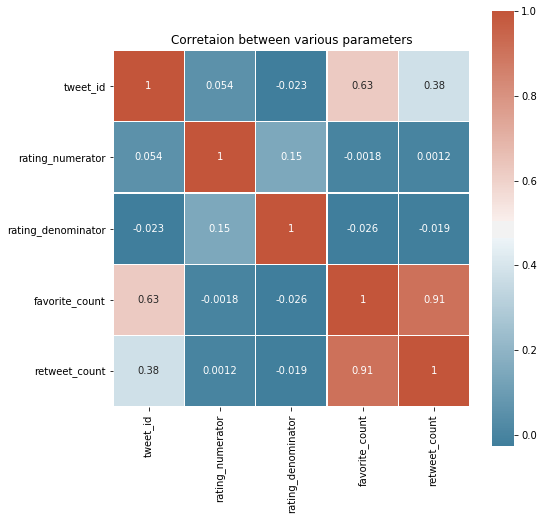

In [69]:
corr = df_masterDataBase.corr()
f,ax = plt.subplots(figsize=(8,8))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, cmap = cmap, square = True, linewidths = 0.5,annot = True )
ax.set_title("Corretaion between various parameters")

#### This plot shows that there is a strong correlation between retweet_count and favorite_count 

#### Checking the this correlation using the scatter plot :

Text(0,0.5,'favorite_count')

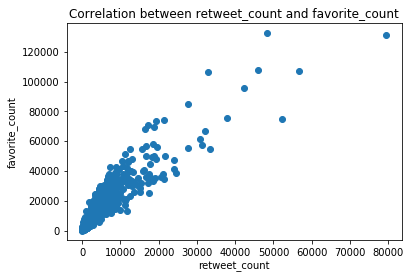

In [70]:
plt.scatter(df_masterDataBase.retweet_count, df_masterDataBase.favorite_count)
plt.title("Correlation between retweet_count and favorite_count")
plt.xlabel("retweet_count")
plt.ylabel("favorite_count")

#### Thus there is strong positive relation between retweet_count and favorite_count i.e for favorites the retweet count is more which is kind of expected

#### Check which is the most popular used Dog Lingo 

In [71]:
df_lingo = pd.DataFrame(df_masterDataBase[df_masterDataBase["Dog_Lingo"] != ""])
df_count = df_lingo.groupby('Dog_Lingo').count()

df_top3 = df_count.sort_values(by=['tweet_id']).tail(3)
df_top3['tweet_id'].sort_values(ascending = False)



Dog_Lingo
pupper    222
doggo      75
puppo      24
Name: tweet_id, dtype: int64

#### Thus the most popular Dog Lingo is Pupper after that Doggo and then Puppo

#### Plotting a Bar chart to see Top 3 most popular Dog Lingos 

Text(0,0.5,'No. Of Entries for each Lingo')

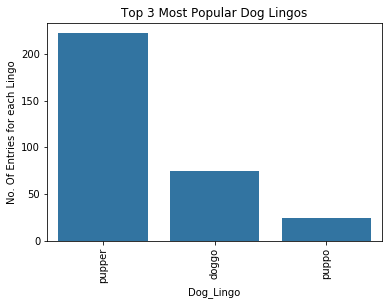

In [72]:
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)

freq = df_lingo['Dog_Lingo'].value_counts()
gen_order = freq.iloc[:3].index
sb.countplot(data=df_lingo, x='Dog_Lingo', color=base_color, order = gen_order);
plt.title ("Top 3 Most Popular Dog Lingos")
plt.ylabel("No. Of Entries for each Lingo")



#### Pupper is by far the most commonly used Lingo for Dogs

#### Checking which Breed is the most popular among people

In [73]:
df_breed = pd.DataFrame(df_masterDataBase[df_masterDataBase["dog_breed_prediction1"] != ""])
df_countbreed = df_breed.groupby('dog_breed_prediction1').count()

df_top3Breed = df_countbreed.sort_values(by=['tweet_id']).tail(3)

df_top3Breed['tweet_id'].sort_values(ascending = False)

dog_breed_prediction1
golden_retriever      137
Labrador_retriever     90
Pembroke               84
Name: tweet_id, dtype: int64

Text(0,0.5,'No. Of Entries for each Breed')

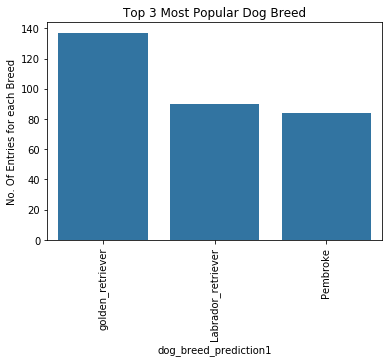

In [74]:
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)

freq = df_breed['dog_breed_prediction1'].value_counts()
gen_order = freq.iloc[:3].index
sb.countplot(data=df_breed, x='dog_breed_prediction1', color=base_color, order = gen_order);
plt.title ("Top 3 Most Popular Dog Breed")
plt.ylabel("No. Of Entries for each Breed")

#### Top 3 most popular Breed's are Golden Retriever, Labrador, Pembroke
#### Golden Retriever is the by far the most popular popular Breed





#### What are the Favorite Counts for the Top 3 Rated  Dog Breeds

In [75]:
dict = {'Breed': ['golden_retriever', 'Labrador','Pembroke']}

fav_count = []
total_count = []

df_golden_retriever = pd.DataFrame(df_masterDataBase[df_masterDataBase["dog_breed_prediction1"] == "golden_retriever"])
fav_goldenRet = (df_golden_retriever['favorite_count'].sum()/10000)
fav_count.append(fav_goldenRet)
Total_goldenRet = df_golden_retriever['tweet_id'].value_counts().sum()
total_count.append(Total_goldenRet)

df_Labrador = pd.DataFrame(df_masterDataBase[df_masterDataBase["dog_breed_prediction1"] == "Labrador_retriever"])
fav_lab = (df_Labrador['favorite_count'].sum()/10000)
fav_count.append(fav_lab)
Total_lab = df_Labrador['tweet_id'].value_counts().sum()
total_count.append(Total_lab)
    
df_Pembroke = pd.DataFrame(df_masterDataBase[df_masterDataBase["dog_breed_prediction1"] == "Pembroke"])
fav_Pem = (df_Pembroke['favorite_count'].sum()/10000)
fav_count.append(fav_Pem)
Total_Pem = df_Pembroke['tweet_id'].value_counts().sum()
total_count.append(Total_Pem)

df_new = pd.DataFrame(dict)
df_new.insert(loc=1, column='Total_Count', value=total_count)
df_new.insert(loc=2, column='Favorite_Count', value=fav_count)

df_new

,Breed,Total_Count,Favorite_Count
0,golden_retriever,137,166.8261
1,Labrador,90,102.0595
2,Pembroke,84,95.5554


#### Favorite_Count is very high for Golden Retriever as compared to other favorite Dog Breeds i.e Labrador and Pembroke

#### Plotting the data in the Bar Chart 

Text(0,0.5,'Favorite Count')

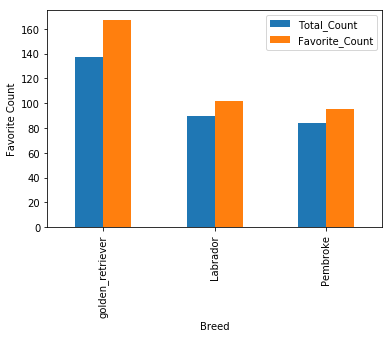

In [76]:
df_new.plot(x="Breed", y=["Total_Count", "Favorite_Count"], kind="bar");
plt.ylabel("Favorite Count")

#### Labrador Breed has the Highest Favorite Count 

#### Which Years are most popular for rating Dogs

In [77]:
df_masterDataBase.groupby(df_masterDataBase.Date.dt.year).rating_numerator.mean()

Date
2015    10.239001
2016    13.301155
2017    18.305990
Name: rating_numerator, dtype: float64

#### Thus clearly 2017(Most Popular), 2016, 2015 are the most popular three years where rating the dogs have become more popular

#### Checking Rating Trends Over the Years 

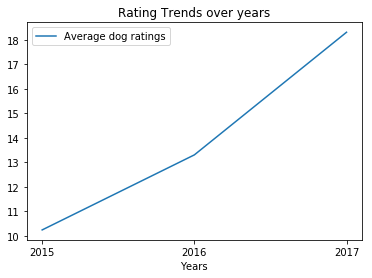

In [78]:
ax = df_masterDataBase.groupby(df_masterDataBase.Date.dt.year).rating_numerator.mean().plot(label='Average dog ratings')
plt.title("Rating Trends over years")
plt.xlabel("Years")
plt.legend()
ax.locator_params(integer=True)


 #### Thus the Rating trends have increased exponentially over these three years




#### Which are most popular Languages used for tweet 

In [79]:
df_lang = df_masterDataBase.groupby('lang').count()

df_top3lang = df_lang.sort_values(by=['tweet_id']).tail(3)

df_top3lang['tweet_id'].sort_values(ascending = False)

lang
en     2106
und       6
nl        3
Name: tweet_id, dtype: int64

Text(0,0.5,'No. Of Entries for each Language')

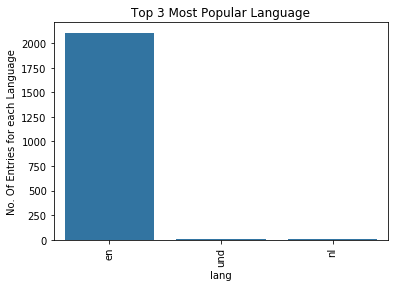

In [80]:
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)

freq = df_masterDataBase['lang'].value_counts()
gen_order = freq.iloc[:3].index
sb.countplot(data=df_masterDataBase, x='lang', color=base_color, order = gen_order);
plt.title ("Top 3 Most Popular Language")
plt.ylabel("No. Of Entries for each Language")

#### Thus major chunk of the tweets entries(2274 out of 2294) are in English Language and very few are in other languages

## Summary for Analysis 

#### Q1: Find the correlation between various paramters and check what all attributes are related

#### There is strong positive relation between retweet_count and favorite_count i.e for favorites the retweet count is more which is kind of expected


#### Q2: What are the most popular Dog Lingo used 
#### most popular Dog Lingo is Pupper after that Doggo and then Puppo

#### Q3 :which Breed is the most popular among people
#### Top 3 most popular Breed's are Golden Retriever, Labrador, Pembroke. Golden Retriever is the by far the most popular popular Breed


#### Q4: What are the Favorite Counts for the Top 3 Rated  Dog Breeds
#### Favorite_Count is very high for Golden Retriever as compared to other favorite Dog Breeds i.e Labrador and Pembroke Labrador Breed has the Highest Favorite Count


#### Q5: Which Years are most popular for rating Dogs
#### Clearly 2017(Most Popular), 2016, 2015 are the most popular three years where rating the dogs have become more popular Rating trends have increased exponentially from 2015-2017 

#### Q6: Which are most popular Languages used for tweet
#### Thus major chunk of the tweets entries(2274 out of 2294) are in English Language and very few are in other languages

